# Introduction to Data Science Project Report

## About the Dataset In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency is expected to peak in the third quarter of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders

### We used the [Credit Card Default payment in Taiwan] (https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) to predict whether the credit card holders are defaulters or Non-defaulters. 

#### The Dataset and its attributes are described below

    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two    months,8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    default.payment.next.month: Default payment (1=yes, 0=no)

### Step 1:Importing Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from scipy.stats import kurtosis, skew
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [47]:
# Importing the Credit Card Default Dataset
dataset = pd.read_csv('default of credit card clients.csv')
#dataset = dataset.sample(n=2000,replace =False,random_state=1)

In [48]:
dataset.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [49]:
data = dataset
data.columns = data.iloc[0]
data = data.reindex(data.index.drop(0)).reset_index(drop=True)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null object
LIMIT_BAL                     30000 non-null object
SEX                           30000 non-null object
EDUCATION                     30000 non-null object
MARRIAGE                      30000 non-null object
AGE                           30000 non-null object
PAY_0                         30000 non-null object
PAY_2                         30000 non-null object
PAY_3                         30000 non-null object
PAY_4                         30000 non-null object
PAY_5                         30000 non-null object
PAY_6                         30000 non-null object
BILL_AMT1                     30000 non-null object
BILL_AMT2                     30000 non-null object
BILL_AMT3                     30000 non-null object
BILL_AMT4                     30000 non-null object
BILL_AMT5                     30000 non-null object
BILL_AM

In [51]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,25897,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [52]:
data.iloc[0:] = data.iloc[0:].astype(float)

In [53]:
data[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,30000.000000,30000.000000
mean,167484.322667,35.485500
std,129747.661567,9.217904
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,1000000.000000,79.000000


In [54]:
data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [55]:
data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [56]:
data.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [57]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [58]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [59]:
data = data.rename(columns={'default payment next month': 'def_paymnt_nxt_mnth', 
                        'PAY_0': 'PAY_1'})
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_paymnt_nxt_mnth
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [60]:
kurtosis(data.iloc[0:23])

array([-1.20454545,  1.70134577, -1.59166667, -1.15659929, -0.39700511,
       -0.3495111 , -0.06615761, -0.21061892, -0.39766104,  0.62693548,
        0.62693548, -0.78341855,  6.88275863,  8.30113126, 11.03826142,
       16.48061686, 17.01992357, 12.15621059, 12.15413234,  5.36877687,
       10.34838183,  0.96966482, 17.84208532,  7.12378709, -0.81372549])

In [61]:
skew(data)

array([-2.56600120e-17,  9.92817316e-01, -4.24162218e-01,  9.70923499e-01,
       -1.87407439e-02,  7.32209256e-01,  7.31938328e-01,  7.90525493e-01,
        8.40639792e-01,  9.99579431e-01,  1.00814661e+00,  9.47981989e-01,
        2.66372783e+00,  2.70508559e+00,  3.08767565e+00,  2.82182419e+00,
        2.87623605e+00,  2.84650224e+00,  1.46676309e+01,  3.04522947e+01,
        1.72157746e+01,  1.29043396e+01,  1.11268607e+01,  1.06401953e+01,
        1.34343677e+00])

In [67]:
pd.crosstab(data['SEX'],data['def_paymnt_nxt_mnth'])

def_paymnt_nxt_mnth,0,1
SEX,,
1,9015,2873
2,14349,3763


In [68]:
pd.crosstab(data['SEX'],data['def_paymnt_nxt_mnth'],normalize='all')

def_paymnt_nxt_mnth,0,1
SEX,,
1,0.3005,0.095767
2,0.4783,0.125433


In [70]:
pd.crosstab(data['EDUCATION'],data['def_paymnt_nxt_mnth'])

def_paymnt_nxt_mnth,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


In [71]:
pd.crosstab(data['EDUCATION'],data['def_paymnt_nxt_mnth'],normalize='all')

def_paymnt_nxt_mnth,0,1
EDUCATION,,
0,0.000467,0.000000
1,0.284967,0.067867
2,0.356667,0.111000
3,0.122667,0.041233
4,0.003867,0.000233
5,0.008733,0.000600
6,0.001433,0.000267


In [72]:
pd.crosstab(data['MARRIAGE'],data['def_paymnt_nxt_mnth'])

def_paymnt_nxt_mnth,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


In [73]:
pd.crosstab(data['MARRIAGE'],data['def_paymnt_nxt_mnth'],normalize='all')

def_paymnt_nxt_mnth,0,1
MARRIAGE,,
0,0.001633,0.000167
1,0.348433,0.106867
2,0.420767,0.111367
3,0.007967,0.002800


In [ ]:
bins = np.array([20,30,40,50,60,70,80])
data['age_Group'] = np.digitize(data['AGE'],bins=bins)
data['age_Group'] = data['age_Group'].apply(lambda v: 'Group-'+str(v))

In [75]:
pd.crosstab(data['def_paymnt_nxt_mnth'],data['age_Group'])

age_Group,Group-1,Group-2,Group-3,Group-4,Group-5,Group-6
def_paymnt_nxt_mnth,,,,,,
0,7421,8962,4979,1759,225,18
1,2197,2276,1485,582,89,7


In [76]:
pd.crosstab(data['def_paymnt_nxt_mnth'],data['age_Group'],normalize='all')

age_Group,Group-1,Group-2,Group-3,Group-4,Group-5,Group-6
def_paymnt_nxt_mnth,,,,,,
0,0.247367,0.298733,0.165967,0.058633,0.007500,0.000600
1,0.073233,0.075867,0.049500,0.019400,0.002967,0.000233


### Step 2: Data Visualisation and Analysis

Text(0.5,1,'SEX v/s COUNT')

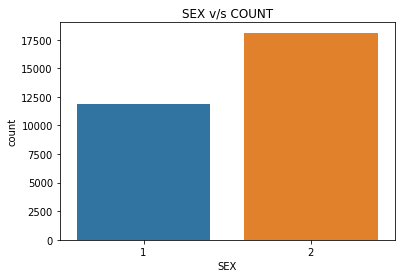

In [77]:
sns.countplot(x='SEX',data=data)
plt.title('SEX v/s COUNT')

Number of Male credit holder is less than Female

Text(0.5,1,'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

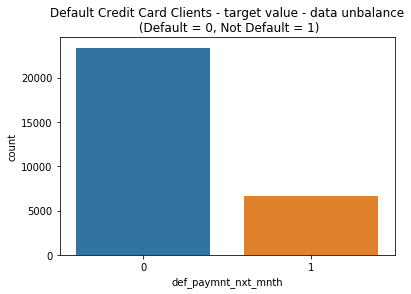

In [79]:
sns.countplot(x='def_paymnt_nxt_mnth',data=data)
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

Percentage of Defaulters are smaller than the Non Defaulters in the given dataset

Text(0.5,1,'EDUCATION v/s COUNT')

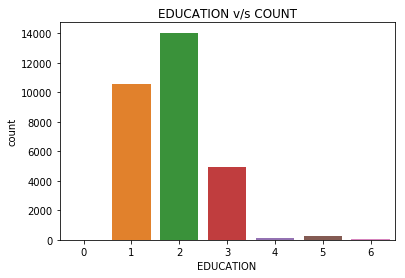

In [80]:
sns.countplot(x='EDUCATION',data=data)
plt.title('EDUCATION v/s COUNT')

More number of credit holders are university students followed by Graduates and then High school students

Text(0.5,1,'MARRIAGE v/s COUNT')

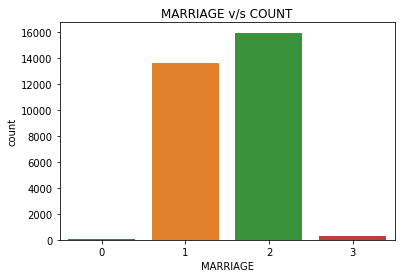

In [81]:
sns.countplot(x='MARRIAGE',data=data)
plt.title('MARRIAGE v/s COUNT')

More number of credit cards holder are Married

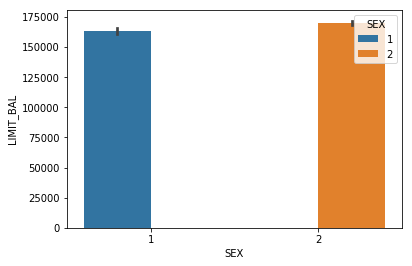

In [82]:
sns.barplot(x='SEX',y='LIMIT_BAL',data=data,hue='SEX')

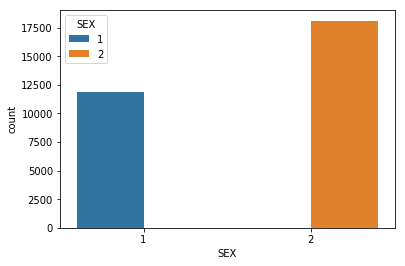

In [84]:
sns.countplot(x='SEX',data=data,hue = 'SEX')

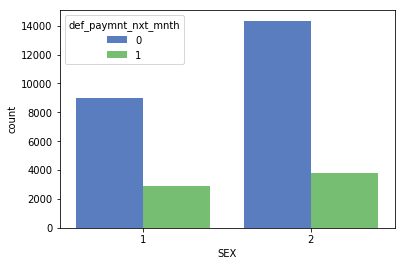

In [85]:
# Checking the number of counts of defaulters and non defaulters sexwise

sns.countplot(x='SEX', data=data,hue="def_paymnt_nxt_mnth", palette="muted")

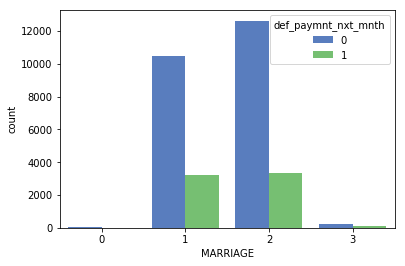

In [86]:
g=sns.countplot(x="MARRIAGE", data=data,hue="def_paymnt_nxt_mnth", palette="muted")

From the above plot it is clear that those people who have marital status single have less default payment wrt 
married status people

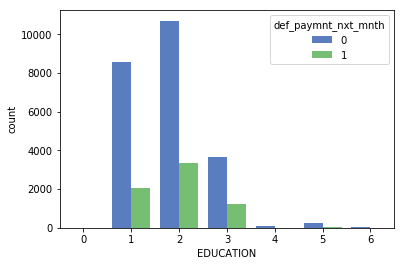

In [87]:
g=sns.countplot(x="EDUCATION", data=data,hue="def_paymnt_nxt_mnth", palette="muted")

From the above plot it is clear that those people who are university students have less default payment wrt graduates and high school people

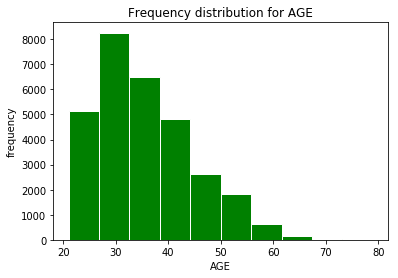

In [120]:
plt.hist(data['AGE'],color= 'green',edgecolor='white',bins=10)
plt.xlabel('AGE')
plt.ylabel('frequency')
plt.title('Frequency distribution for AGE')
plt.show()

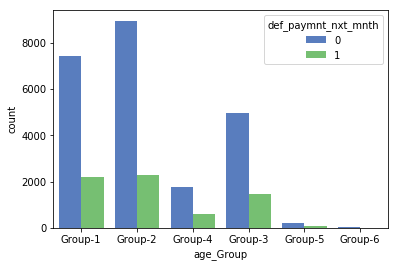

In [106]:
g=sns.countplot(x="age_Group", data=data,hue="def_paymnt_nxt_mnth", palette="muted")

In [88]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

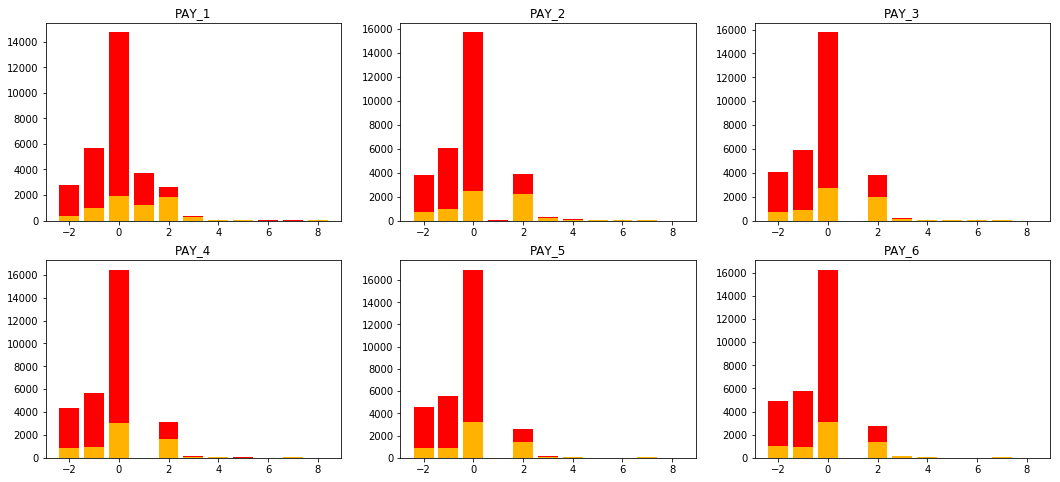

In [89]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = data[pay_status_columns[i]].value_counts()
    x = data[pay_status_columns[i]][(data['def_paymnt_nxt_mnth']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
   
plt.show()


The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.

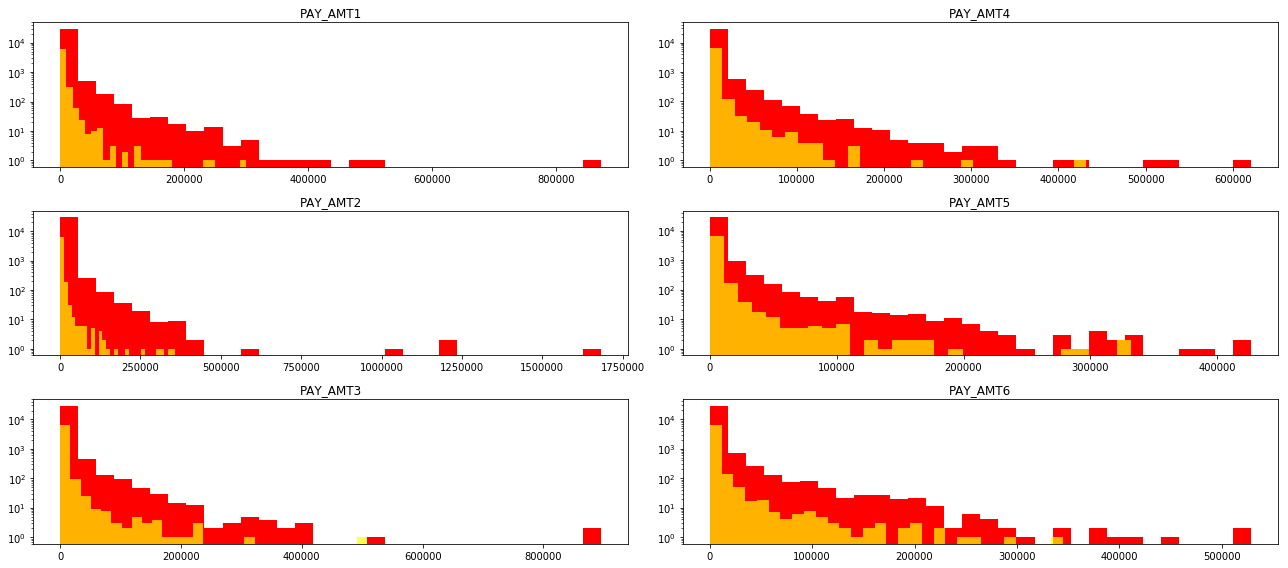

In [90]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(data[pay_amt_columns[i]], 30, color ='red')
    ax[row,col].hist(data[pay_amt_columns[i]][(data['def_paymnt_nxt_mnth']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters

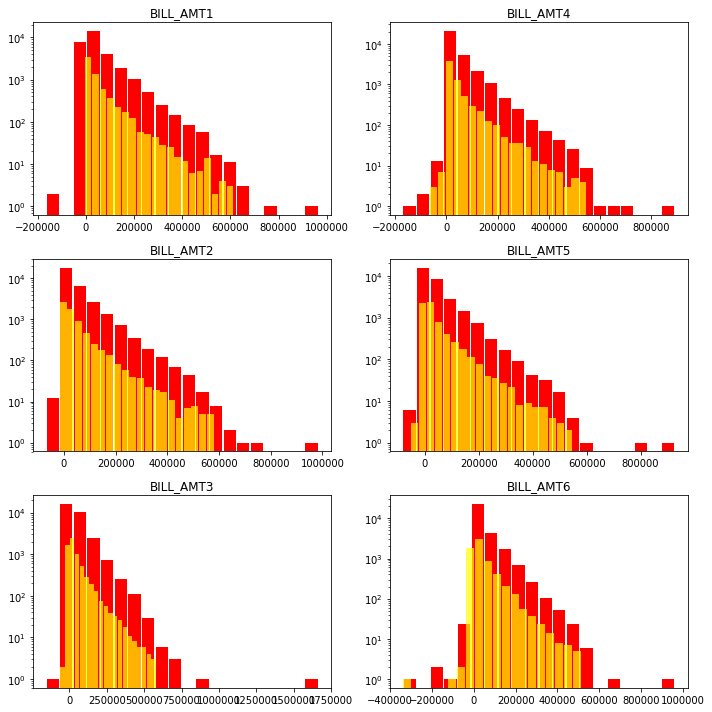

In [91]:
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(data[bill_atm_columns[i]], 20,rwidth=0.9, color ='red')
    ax[row,col].hist(data[bill_atm_columns[i]][(data['def_paymnt_nxt_mnth']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

The above histogram shows the distribution of Bill amount generated for each month explicitly for defaulters and non-defaulters

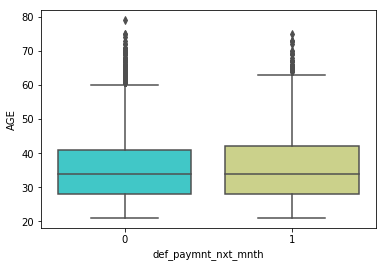

In [92]:
sns.boxplot(x='def_paymnt_nxt_mnth',y='AGE',data=data,palette='rainbow')

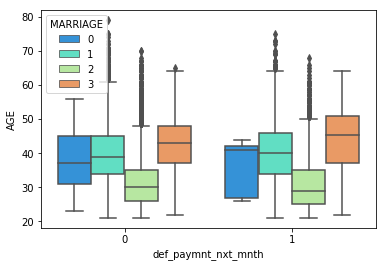

In [93]:
sns.boxplot(x='def_paymnt_nxt_mnth',hue='MARRIAGE', y='AGE',data=data,palette="rainbow")

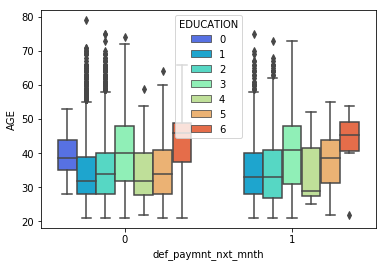

In [94]:
sns.boxplot(x='def_paymnt_nxt_mnth',hue='EDUCATION', y='AGE',data=data,palette="rainbow" )

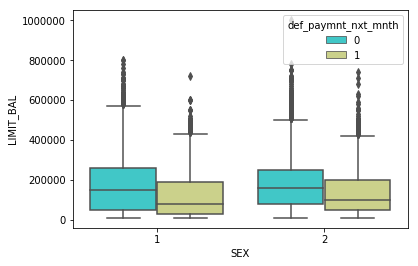

In [95]:
sns.boxplot(x='SEX',hue='def_paymnt_nxt_mnth', y='LIMIT_BAL',data=data,palette="rainbow")

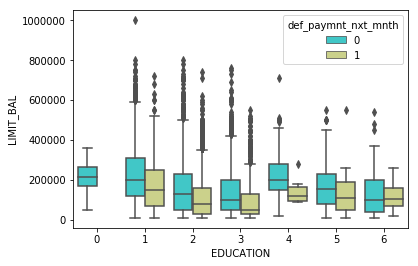

In [96]:
sns.boxplot(x='EDUCATION',hue='def_paymnt_nxt_mnth', y='LIMIT_BAL',data=data,palette="rainbow")

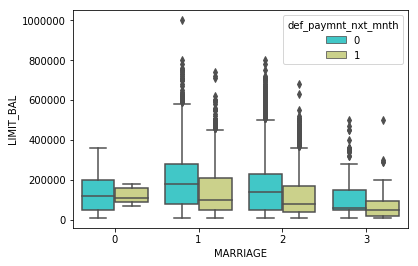

In [97]:
sns.boxplot(x='MARRIAGE',hue='def_paymnt_nxt_mnth', y='LIMIT_BAL',data=data,palette="rainbow")

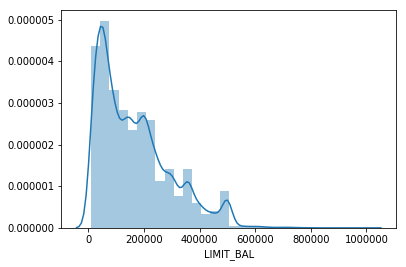

In [98]:
sns.distplot(data['LIMIT_BAL'],kde=True,bins=30)

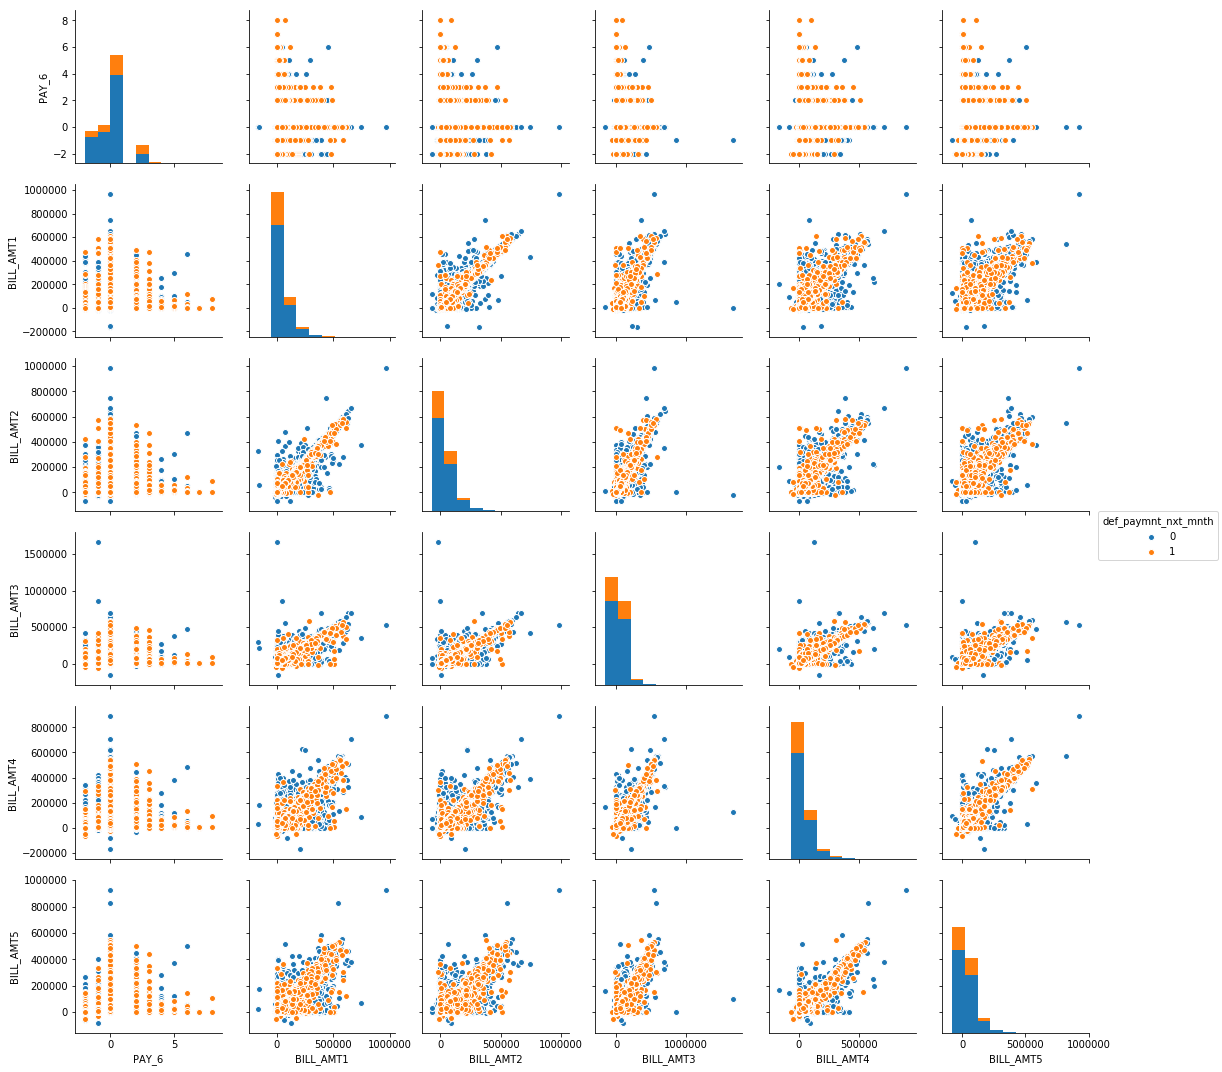

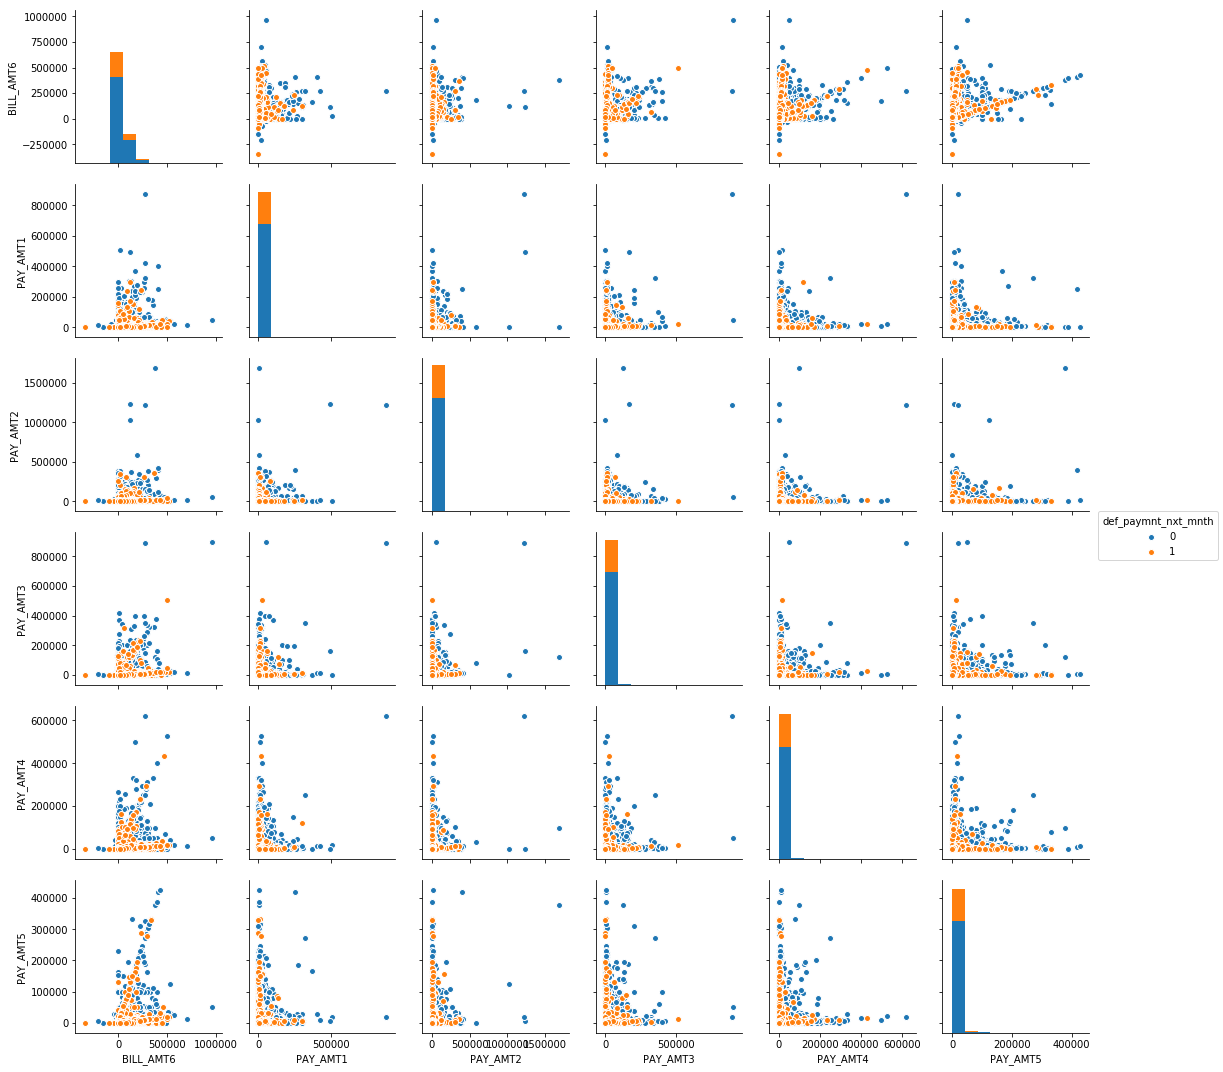

In [99]:
# plot columns with similar names to check the correlation

sns.pairplot(data, vars=data.columns[11:17], kind='scatter',hue= 'def_paymnt_nxt_mnth')
sns.pairplot(data, vars=data.columns[17:23],hue = 'def_paymnt_nxt_mnth')

### Step 3: Observing Correlation between features of the Dataset

In [100]:
correlation = data.corr()

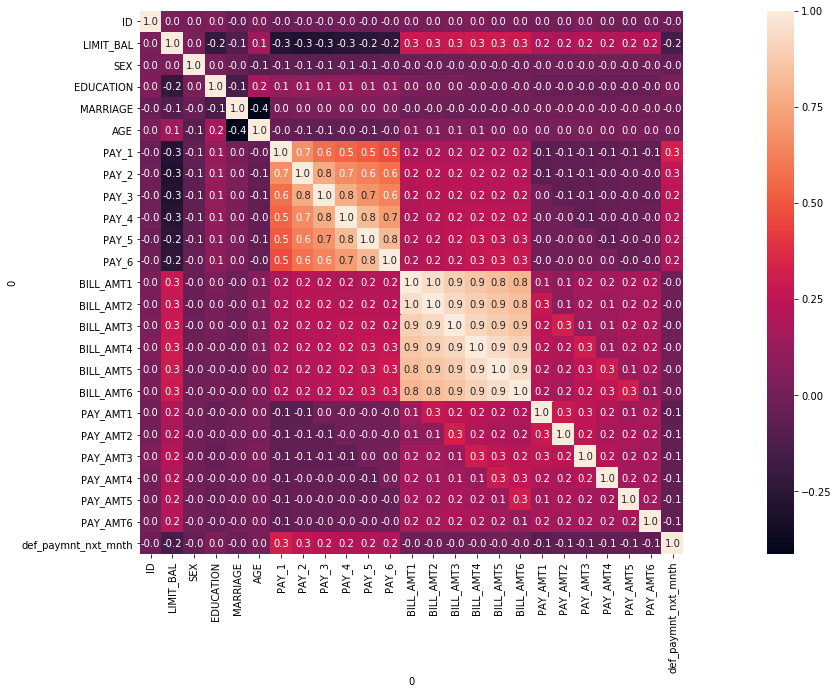

In [101]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )

So it looks like the PAY_0, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables.

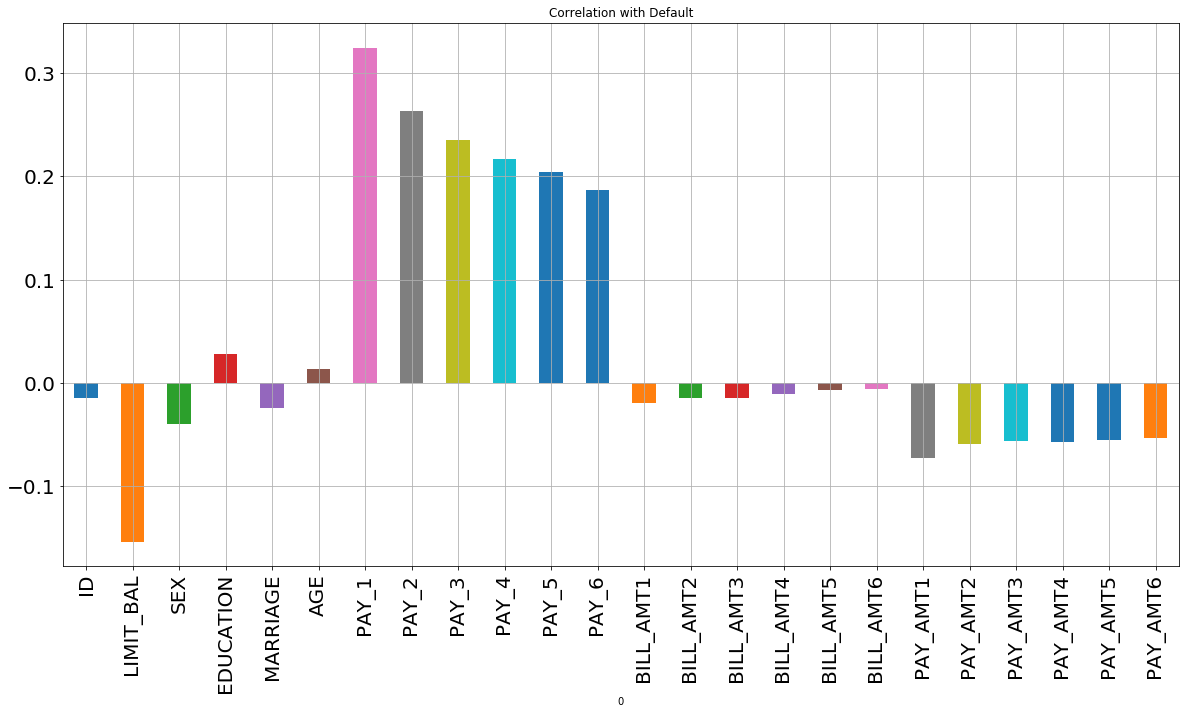

In [122]:
data.drop(['age_Group'],axis = 1,inplace = True)
X = data.drop(['def_paymnt_nxt_mnth'],axis=1)
X.corrwith(data['def_paymnt_nxt_mnth']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because according to me it is very important feature for prediction. ID is unimportant and it has no role in prediction so we will remove it later.

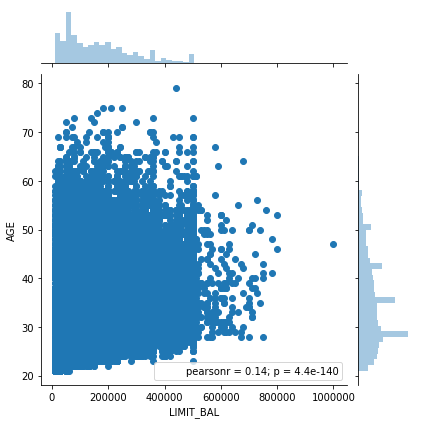

In [103]:
sns.jointplot(x='LIMIT_BAL',y='AGE',data=data,kind="scatter")

#### Facet Grid

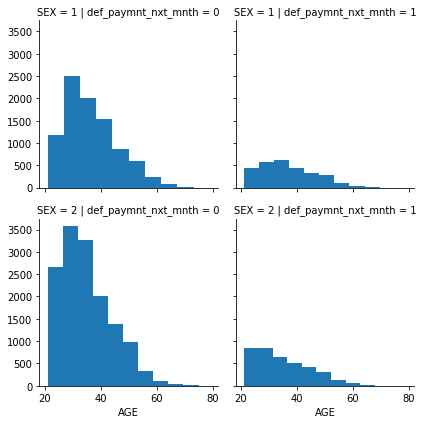

In [123]:
g = sns.FacetGrid(data, col = 'def_paymnt_nxt_mnth', row = 'SEX')
g.map(plt.hist, 'AGE')


From the above FaceGrid Plot we can see that NonDefaults have a higher proportion of people 30-40years

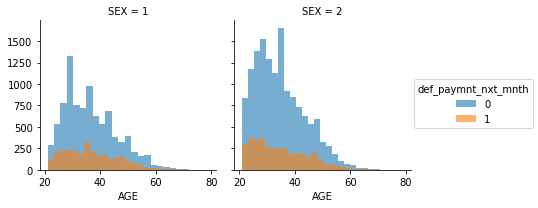

In [124]:
g = sns.FacetGrid(data, col='SEX', hue='def_paymnt_nxt_mnth')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

From the above FaceGrid Plot we can see that NonDefaults have a higher proportion of Female age between 30-40years

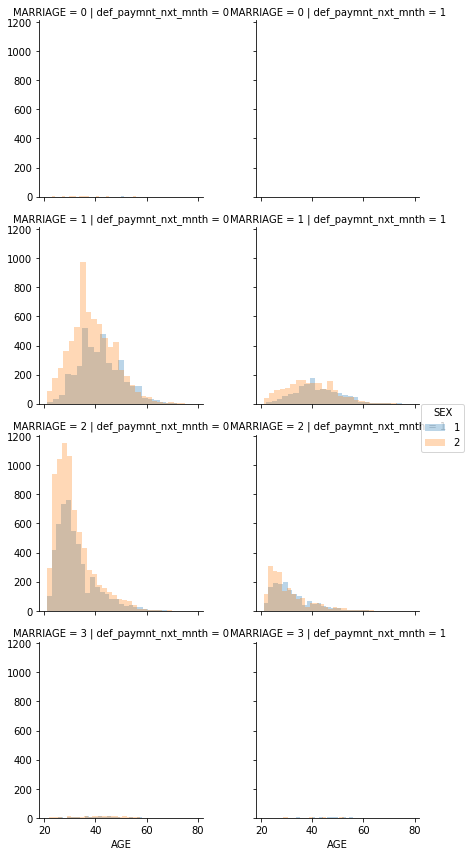

In [125]:
g = sns.FacetGrid(data, col='def_paymnt_nxt_mnth', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25) 
g.add_legend()

### Step 4: Data Cleaning
EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.

MARRIAGE has a label 0 that is undocumented

Data Transformation

The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)

Thus is a good occasion to learn how to use the .loc function

In [45]:
fil = (data.EDUCATION == 5) | (data.EDUCATION == 6) | (data.EDUCATION == 0)
data.loc[fil, 'EDUCATION'] = 4
data.EDUCATION.value_counts()

2    13886
1    10448
3     4859
4      807
Name: EDUCATION, dtype: int64

In [46]:
data['EDUCATION'].value_counts(dropna = False)

2    13886
1    10448
3     4859
4      807
Name: EDUCATION, dtype: int64

In [48]:
data.loc[data.MARRIAGE == 0, 'MARRIAGE'] = 3
data.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [49]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_paymnt_nxt_mnth
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [0]:

fil = (dataset.PAY_1 == -1) | (dataset.PAY_1==-2)
dataset.loc[fil,'PAY_1']=0
dataset.PAY_1.value_counts()
fil = (dataset.PAY_2 == -1) | (dataset.PAY_2==-2)
dataset.loc[fil,'PAY_2']=0
dataset.PAY_2.value_counts()
fil = (dataset.PAY_3 == -1) | (dataset.PAY_3==-2)
dataset.loc[fil,'PAY_3']=0
dataset.PAY_3.value_counts()
fil = (dataset.PAY_4 == -1) | (dataset.PAY_4==-2)
dataset.loc[fil,'PAY_4']=0
dataset.PAY_4.value_counts()
fil = (dataset.PAY_5 == -1) | (dataset.PAY_5==-2)
dataset.loc[fil,'PAY_5']=0
dataset.PAY_5.value_counts()
fil = (dataset.PAY_6 == -1) | (dataset.PAY_6==-2)
dataset.loc[fil,'PAY_6']=0
dataset.PAY_6.value_counts()

In [0]:
dataset.head()

In [0]:
dataset.plot(y = 'PAY_1',kind='hist')
plt.legend()
plt.show()

In [0]:

dataset['PAY_1'].describe()

In [0]:
dataset.info()

In [0]:
dataset.SEX.nunique()

In [0]:

dataset[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

In [0]:
dataset[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

In [0]:
dataset.columns

### One Hot encoding for categorical variable

In [0]:
#categorical_vars = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4',
                   #'PAY_5','PAY_6']
#dataset[categorical_vars] = dataset[categorical_vars].astype(str)
#dataset = pd.get_dummies(dataset,columns=categorical_vars,drop_first=True)
#dataset.head()

In [0]:
dataset.shape

In [0]:
dataset.columns = dataset.columns.map(str.lower)

In [0]:
dataset.head()

### Step 5: Feature Scaling of Numerical Attributes

In [0]:
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
dataset[col_to_norm] = dataset[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [0]:
dataset.head(10)

### Step 6: Spiliting Dataset into training(70%) and test set(30%)

    https://github.com/meauxt/credit-card-default
    https://github.com/deepan04/Analyze-Default-status-of-Credit-Card-Clients
    https://github.com/zkneupper/Default-Prediction-Capstone/tree/master/reports
    https://github.com/KaushikJais/Credit-Card-Default/blob/master/Credit%20Card%20Default%20(Final%20Submission)%20(1).ipynb
    https://nycdatascience.com/blog/student-works/credit-card-clients/